<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_**OLA BIENVENIDA**_

In [ ]:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform

In [ ]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df.head(3)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

Eliminaremos todos las variables no numericas y las que no nos aportan información

In [ ]:
df = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)

In [ ]:
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


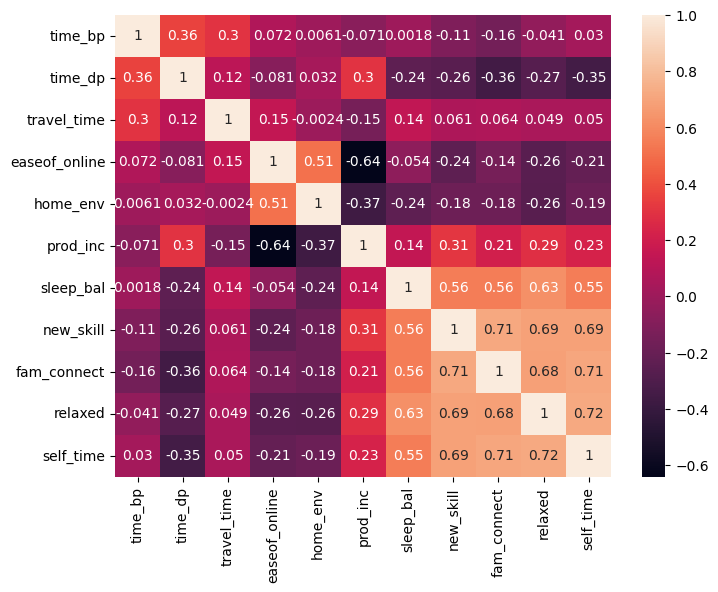

In [ ]:
corr_df = df.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
dfprueba = df.sample(10)
dfprueba

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
605,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
39,5,4,0.5,4,4,-0.5,-1.0,-0.5,-0.5,-1.0,-1.0
593,7,9,1.5,1,1,0.5,0.5,1.0,1.0,0.0,0.5
947,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
936,7,7,0.5,2,1,-0.5,0.0,0.5,1.0,0.5,1.0
501,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
38,4,4,0.5,1,3,1.0,1.0,1.0,1.0,1.0,1.0
166,12,12,0.5,1,3,-1.0,-1.0,0.0,0.0,0.0,0.0
509,7,9,1.5,1,1,0.5,0.5,1.0,1.0,0.0,0.5
794,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba)
print(df_scaled)

[[-0.73088709  0.4307749   1.52752523  0.         -0.08192319  0.74535599
   0.93541435  0.87447463  0.87447463  1.45260037  0.        ]
 [-0.73088709 -1.3641205  -0.65465367  1.49071198  1.55654065 -0.74535599
  -1.06904497 -1.14354375 -1.14354375 -1.31425748 -1.34839972]
 [ 0.12898007  0.4307749   1.52752523 -0.74535599 -0.90115511  0.74535599
   0.93541435  0.87447463  0.87447463  0.06917145  0.67419986]
 [ 0.12898007  1.14873305 -0.65465367  2.23606798  1.55654065  0.
  -1.06904497  0.87447463 -1.14354375 -1.31425748 -1.34839972]
 [ 0.12898007 -0.28718326 -0.65465367  0.         -0.90115511 -0.74535599
   0.26726124  0.20180184  0.87447463  0.76088591  1.34839972]
 [ 0.98884723  0.4307749  -0.65465367  0.         -0.90115511  0.74535599
  -0.40089186 -1.14354375  0.20180184  0.06917145  0.        ]
 [-1.16082067 -1.3641205  -0.65465367 -0.74535599  0.73730873  1.49071198
   1.60356745  0.87447463  0.87447463  1.45260037  1.34839972]
 [ 2.27864798  1.50771213 -0.65465367 -0.74535599

In [ ]:
#Valores = dfprueba.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values
#Valores

In [ ]:
#dendo= linkage(Valores,'ward')
dendo=linkage(df_scaled, 'ward')

19

Forma de pasar el dendograma a tipo clusternode

In [ ]:
tree_Z = sch.to_tree(dendo)
print(tree_Z)

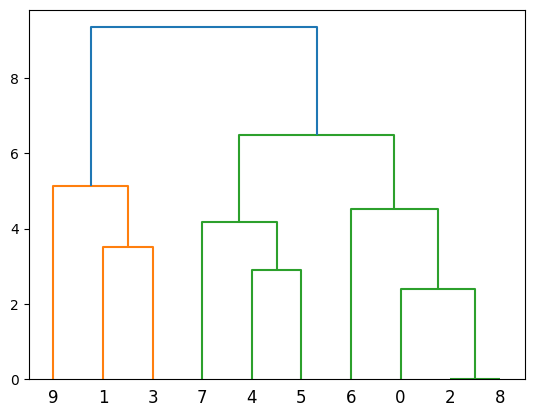

In [ ]:
dendograma = sch.dendrogram(dendo)

Función para volver un dendograma en formato netwick

In [ ]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

In [ ]:
leaf_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]
#Z = hierarchy.linkage([Valores], "ward")
tree1 = hierarchy.to_tree(dendo, False)

newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)

print(newick_tree1)


(((((8:0.00,2:0.00):2.40,0:2.40):2.11,6:4.51):1.98,((5:2.91,4:2.91):1.26,7:4.18):2.32):2.85,((3:3.50,1:3.50):1.63,9:5.12):4.22);
